In [1]:
import boto3
import pandas as pd
import pyarrow.parquet as pq
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
sns.set(style="whitegrid")

In [2]:
S3_BUCKET = "danske-bank-project"
s3 = boto3.client("s3")

datasets = [
    "fraud_by_category",
    "fraud_by_type",
    "fraud_by_location"
]

dataframes = {}

for ds in datasets:
    prefix = f"gold/{ds}/"
    try:
        response = s3.list_objects_v2(Bucket=S3_BUCKET, Prefix=prefix)
        if 'Contents' not in response:
            print(f"No files found for {ds}")
            continue

        files = [obj['Key'] for obj in response['Contents'] if obj['Key'].endswith(".parquet")]
        if not files:
            print(f"No Parquet files found for {ds}")
            continue

        dfs = []
        for file in files:
            obj = s3.get_object(Bucket=S3_BUCKET, Key=file)
            df = pd.read_parquet(io.BytesIO(obj['Body'].read()))
            dfs.append(df)
        if dfs:
            dataframes[ds] = pd.concat(dfs, ignore_index=True)
            print(f"{ds}: {len(dataframes[ds])} rows loaded")
        else:
            print(f"{ds}: no data loaded")

    except Exception as e:
        print(f"Failed to load {ds}: {e}")

fraud_by_category: 8 rows loaded
fraud_by_type: 4 rows loaded
fraud_by_location: 8 rows loaded


/tmp/ipykernel_70676/1809072130.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


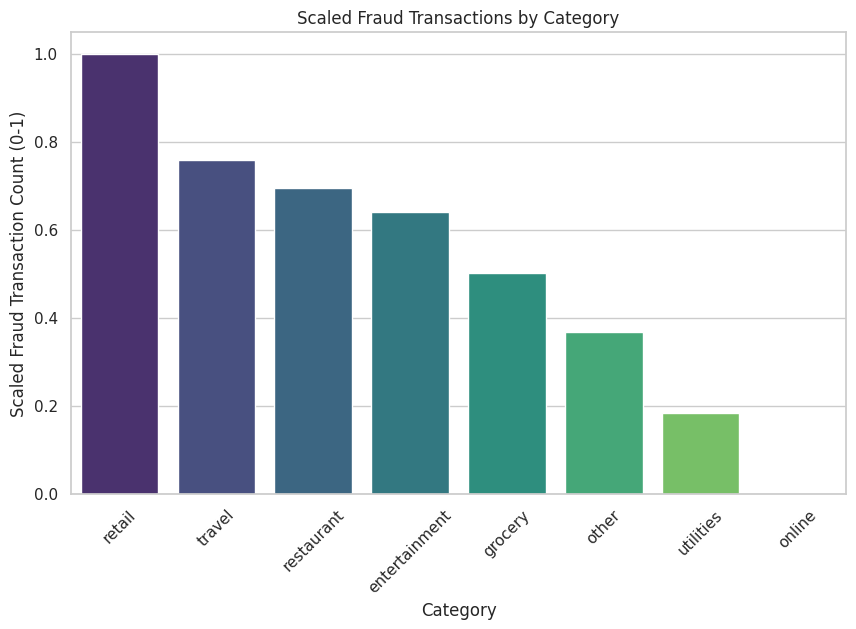

In [3]:
fraud_cat_df = dataframes.get("fraud_by_category")

if fraud_cat_df is not None:
    # Initialize Min-Max Scaler
    scaler = MinMaxScaler()

    # Copy dataframe to avoid modifying original
    df_scaled = fraud_cat_df.copy()

    # Apply Min-Max scaling to numeric columns
    numeric_cols = ["fraud_transaction_count", "fraud_amount"]
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

    # Sort by scaled fraud_transaction_count for plot
    df_sorted_count = df_scaled.sort_values("fraud_transaction_count", ascending=False)

    # Plot scaled fraud transactions by category
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_sorted_count,
        x="Category",
        y="fraud_transaction_count",
        palette="viridis"
    )
    plt.xticks(rotation=45)
    plt.ylabel("Scaled Fraud Transaction Count (0-1)")
    plt.title("Scaled Fraud Transactions by Category")
    plt.show()

/tmp/ipykernel_70676/1326426597.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


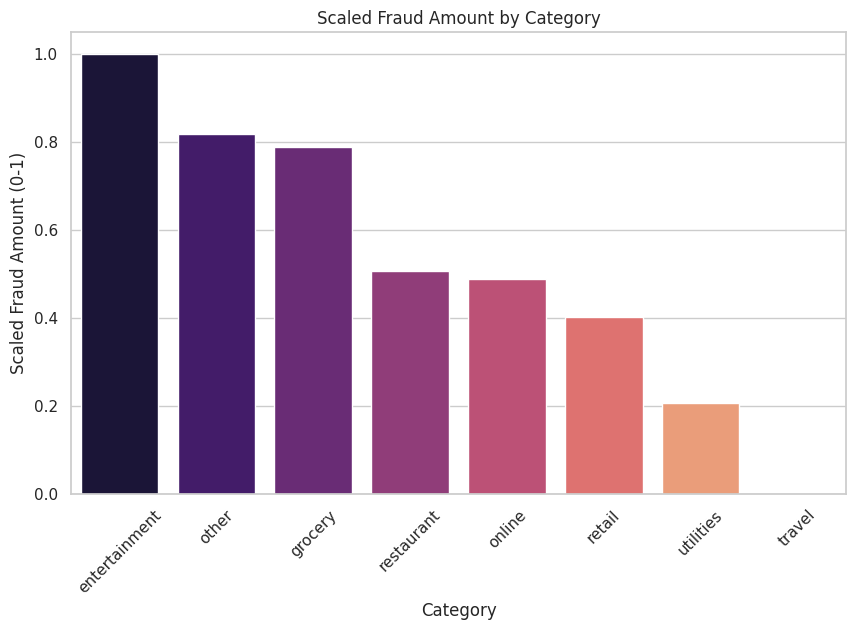

In [4]:
# Sort by scaled fraud_amount for plot
df_sorted_amount = df_scaled.sort_values("fraud_amount", ascending=False)

# Plot scaled fraud amount by category
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_sorted_amount,
    x="Category",
    y="fraud_amount",
    palette="magma"
)
plt.xticks(rotation=45)
plt.ylabel("Scaled Fraud Amount (0-1)")
plt.title("Scaled Fraud Amount by Category")
plt.show()

/tmp/ipykernel_70676/607683424.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


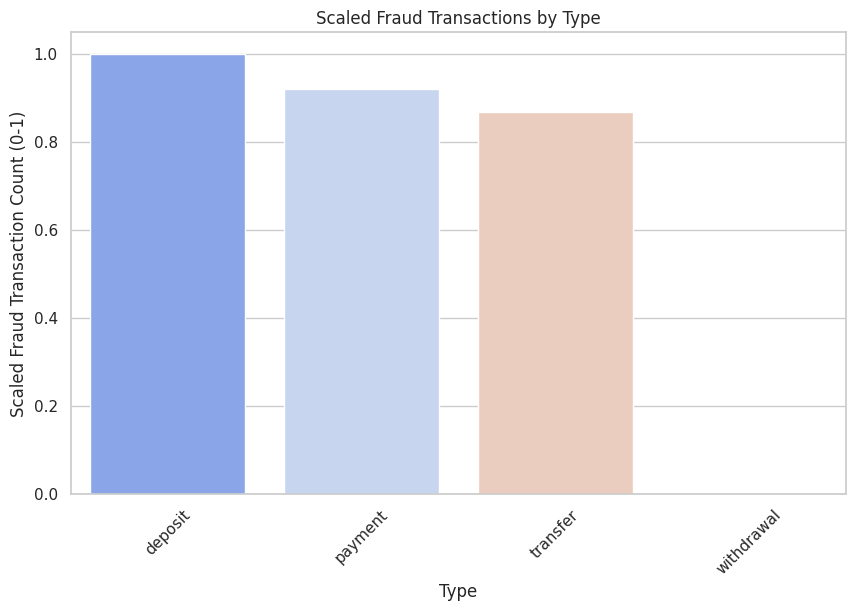

/tmp/ipykernel_70676/607683424.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


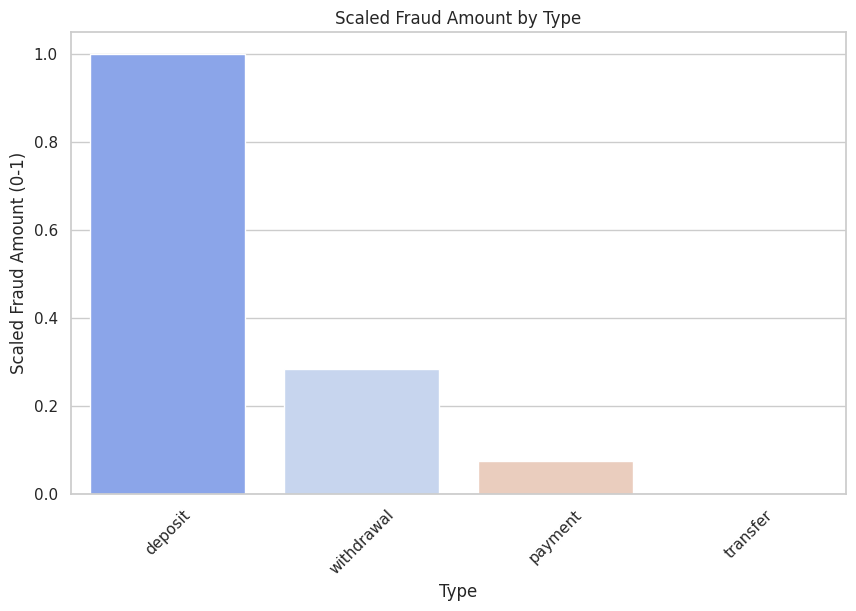

In [5]:
fraud_type_df = dataframes.get("fraud_by_type")  # make sure to use 'dataframes'

if fraud_type_df is not None:
    # Copy dataframe to avoid modifying original
    df_scaled = fraud_type_df.copy()

    # Initialize Min-Max Scaler
    scaler = MinMaxScaler()

    # Apply Min-Max scaling to numeric columns
    numeric_cols = ["fraud_transaction_count", "fraud_amount"]
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

    # Plot scaled fraud transactions by type
    df_sorted_count = df_scaled.sort_values("fraud_transaction_count", ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_sorted_count,
        x="Type",
        y="fraud_transaction_count",
        palette="coolwarm"
    )
    plt.xticks(rotation=45)
    plt.ylabel("Scaled Fraud Transaction Count (0-1)")
    plt.title("Scaled Fraud Transactions by Type")
    plt.show()

    # Plot scaled fraud amount by type
    df_sorted_amount = df_scaled.sort_values("fraud_amount", ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_sorted_amount,
        x="Type",
        y="fraud_amount",
        palette="coolwarm"
    )
    plt.xticks(rotation=45)
    plt.ylabel("Scaled Fraud Amount (0-1)")
    plt.title("Scaled Fraud Amount by Type")
    plt.show()

/tmp/ipykernel_70676/2229040509.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


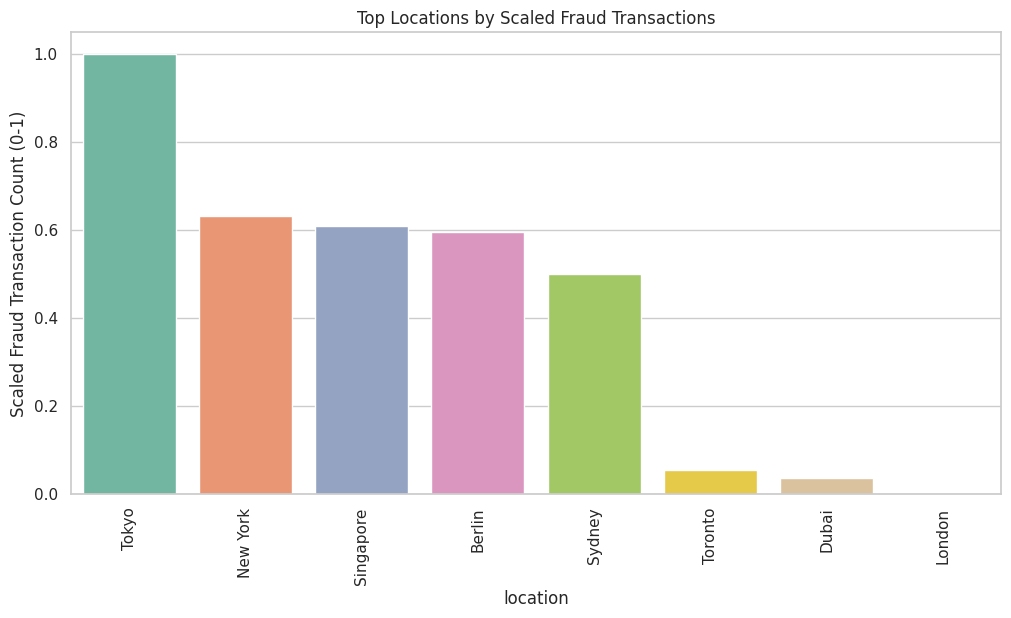

/tmp/ipykernel_70676/2229040509.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


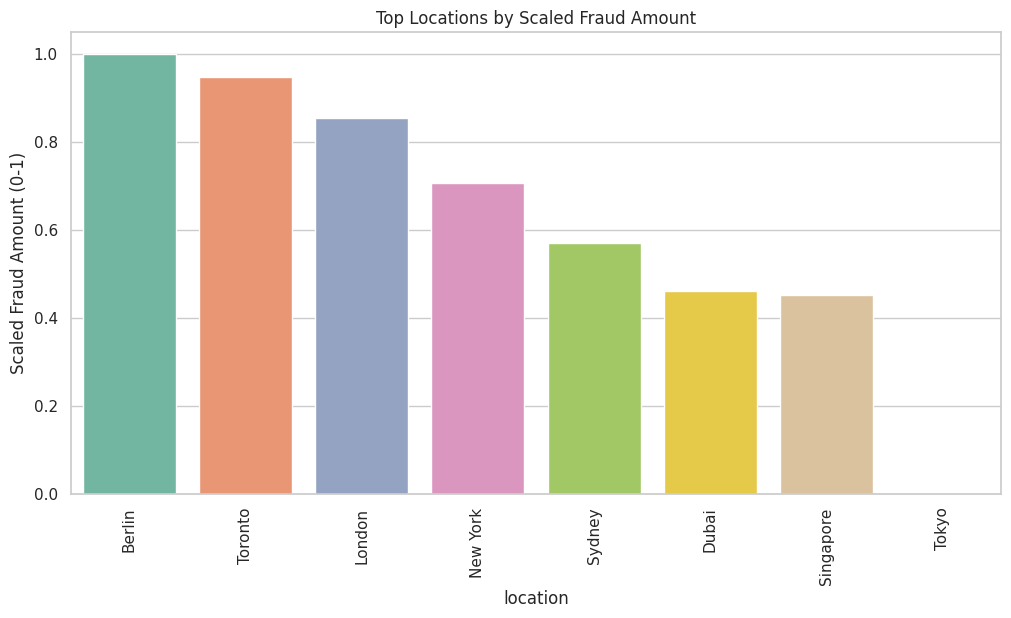

In [6]:
fraud_loc_df = dataframes.get("fraud_by_location")  # make sure to use 'dataframes'

if fraud_loc_df is not None:
    # Copy dataframe to avoid modifying original
    df_scaled = fraud_loc_df.copy()

    # Initialize Min-Max Scaler
    scaler = MinMaxScaler()

    # Apply Min-Max scaling to numeric columns
    numeric_cols = ["fraud_transaction_count", "fraud_amount"]
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

    # Top 20 locations by scaled fraud transactions
    top_locations_count = df_scaled.sort_values("fraud_transaction_count", ascending=False).head(20)
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=top_locations_count,
        x="location",
        y="fraud_transaction_count",
        palette="Set2"
    )
    plt.xticks(rotation=90)
    plt.ylabel("Scaled Fraud Transaction Count (0-1)")
    plt.title("Top Locations by Scaled Fraud Transactions")
    plt.show()

    # Top 20 locations by scaled fraud amount
    top_locations_amount = df_scaled.sort_values("fraud_amount", ascending=False).head(20)
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=top_locations_amount,
        x="location",
        y="fraud_amount",
        palette="Set2"
    )
    plt.xticks(rotation=90)
    plt.ylabel("Scaled Fraud Amount (0-1)")
    plt.title("Top Locations by Scaled Fraud Amount")
    plt.show()